# Sección A: Datos abiertos de la CDMX - Carpetas de delitos a nivel de calle

## Introducción

La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: https://datos.cdmx.gob.mx/explore

Esta base de datos contiene las Carpetas de investigación de delitos a nivel de calle de la Procuraduría General de Justicia de la Ciudad de México desde enero de 2016 hasta junio de 2019.[1]. Una breve lectura de este cuestionario refiere el análisis a CDMX, esto eso la Ciudad de México, que es la capital de los Estados Unidos Mexicanos y se localiza en el valle de México, a una altitud media de 2240 m.s.n.m. Tiene una superficie de 1495 km², y se divide administrativamente en dieciséis demarcaciones. Su población ya supera los nueve millones de habitantes, con 9,209,944 habitantes de acuerdo con los resultados del XIV Censo de Población y Vivienda (2020).[2]  

A fin de responder las doce consultas del cuestionario, se hará previamente un análisis exploratorio de los datos recibidos, así como evaluar la consistencia de los datos y sus tipos.

### Análisis Exploratorio

Iniciaremos cargando las bibliotecas de funciones y los datos que fueron descargados en la carpeta de trabajo. Cada bloque de este notebook se complementará con comentarios para guiar al lector en el procedimiento utilizado.

In [1]:
# Step 0. Cargar bibliotecas y funciones ·······················#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Step 1. Cargar los datos del archivo CSV ·····················#
dataset = pd.read_csv('carpetas-de-investigacion-pgj-cdmx.csv')

In [3]:
# Step 2. Realizar un análisis exploratorio de datos ···········#
# 2.1. Primero demos un vistazo de las cinco primeras observaciones del dataset
dataset.head(5)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


In [4]:
# 2.2 Veamos las dimensiones básicas del dataset
dataset.shape

(808871, 19)

A primera vista se observan datos de ocurrencias de delitos con fecha, categoría, sector poblado, dirección y ubicación geográfica (latitud y longitud). Estos datos no disponen de un diccionario de datos que permita establecer de las dos fechas dadas "fecha_hechos" y "fecha inicio" se defina explicitamente de que se trata, así que se tomará como premisas que "fecha_hechos" es la fecha y hora aproximada declarada por el denunciante, y "fecha_inicio" es la fecha y hora del asentamiento de denuncia e inicio de investigación. 

Podemos notar que hay observaciones que tienen algunas variables NaN, como "colonia_hechos", "latitud", "longitud" y "geopoint". 

Uno de los aspectos que resaltó de esta exploración fue ver la alcaldía de Tlalnepantla de Baz, la cual luego de la lectura del árticulo de la referencia 2 no está contemplada entre las diecisés demarcaciones. Haremos una revisión de las alcaldías de este dataset.

In [5]:
# 2.3. Veamos el total de alcaldías ··················#
dataset['alcaldia_hechos'].nunique()

485

A fin de restringir el análisis a la Ciudad de México, filtraremos los datos que no estén dentro de estas dieciséis demarcaciones.

In [6]:
dataset = dataset[dataset['alcaldia_hechos'].isin([\
'ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS',\
'CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS',\
'MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]

In [7]:
# 2.4. Veamos el tipo de datos del dataset ···········#
dataset.dtypes

id                        int64
ao_hechos               float64
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                float64
latitud                 float64
geopoint                 object
dtype: object

Se observa que fecha_hechos y fecha_inicios no son de tipo fecha y hora, por lo que se hará una conversión del mismo a un formato adecuado.

In [8]:
# 2.5 Convertir tipo de datos ················································#
dataset.fecha_hechos = dataset.fecha_hechos.astype('datetime64')
dataset.fecha_inicio = dataset.fecha_inicio.astype('datetime64')

In [9]:
# 2.6. Procedamos a dar un vistazo a las variables numéricas del dataset ·····#
dataset.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,800207.000000,800021.000000,800021,800207,800207.000000,777531.000000,777531.000000
mean,404440.724969,2017.233964,2017-09-15 06:18:33.451072768,2017-11-08 17:23:31.065400576,2017.385711,-99.137482,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202177.500000,2016.000000,2016-11-28 10:30:00,2017-01-09 17:54:14,2017.000000,-99.174906,19.342264
50%,404476.000000,2017.000000,2017-10-27 11:30:00,2017-11-27 12:11:57,2017.000000,-99.142680,19.391685
75%,606686.500000,2018.000000,2018-08-25 13:00:00,2018-09-19 16:27:08.500000,2018.000000,-99.101421,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.946873,19.582490
std,233527.398708,1.412214,NaN,NaN,1.020460,0.058753,0.069692


In [10]:
# 2.7 Veamos las dimensiones luego de los cambios efectuados ··················#
dataset.shape

(800207, 19)

Luego de hacer una breve descripción del dataset, podemos observar que hay 800,207 observaciones. En las variables numéricas vemos que no todas están completas, por ejemplo las variables "longitud" y "latitud" sólo hay 777,531 valores respectivamente, esto es 97.19% del total de observaciones. 

### Cuestionario de preguntas

#### 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.
La primera prueba sería consistencia de datos. Esta prueba se efectúa mediante una descripción de las variables, que contengan las medidas de descripción, tendencia central, desviación y percentiles. Por ejemplo en el análisis previo vemos que la variable "ao_hechos" tiene un valor mínimo de 1906, que corresponde al año de "fecha_hechos". Un marco adecuado serían fechas que estén entre el 2016 al 2019, que son los años donde se encuentran las denuncias. Con este marco podemos corregir o excluir datos inconsistentes, teniendo cuidado con los outliers que pueden no necesariamente ser errores. [2]

#### 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [11]:
# Imprimamos los datos de cantidad, mínimo y máximo de datos
print(f"En el dataset original se tiene registrados {len(dataset)} delitos, a partir del \
{dataset['fecha_hechos'].min()} hasta el {dataset['fecha_hechos'].max()}") 

En el dataset original se tiene registrados 800207 delitos, a partir del 1906-06-02 19:00:00 hasta el 2019-06-30 23:00:00


In [12]:
# Este rango puede estar errado, por lo que agregaremos una columna adicional con una modificación
dataset['fecha_hechos_mod'] = dataset['fecha_hechos'].mask(dataset['fecha_hechos'].dt.year < 2016, \
                                                           dataset['fecha_inicio'])

print(f"En el dataset corregido hay registrados {len(dataset)} delitos, a partir del \
{dataset['fecha_hechos_mod'].min()} hasta el {dataset['fecha_hechos_mod'].max()}") 

En el dataset corregido hay registrados 800207 delitos, a partir del 2016-01-01 00:00:00 hasta el 2019-06-30 23:22:07


Esta pregunta requiere un poco de criterio del analista, ya que el dataset original no es consistente respecto al año de registro contra el año del delito. Dado que hemos hecho la transformación, convertiremos la variable "fecha_hechos_mod" en el índice del dataset.

In [13]:
# Definimos la fecha de los hechos modificada como índice 
dataset.set_index('fecha_hechos_mod', inplace = True)

#### 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

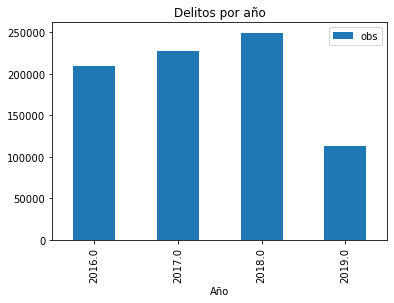

In [14]:
# Aquí realizamos una agregación para calcular la frecuencia por año
dataset_counts = dataset.groupby(dataset.index.year).size().reset_index(name = 'obs')
# Realizamos un gráfico de barras para ver la distribución del número de delitos por año
dataset_counts.plot.bar(x = 'fecha_hechos_mod', y = 'obs', title = 'Delitos por año', xlabel = 'Año')
plt.show()

Esta primera vista de los delitos muestra una tendencia al alza en los años 2016 al 2018, quedando pendiente observar como terminaría el 2019. Ahora pasaremos a mostrar los cinco delitos más frecuentes:

In [15]:
# Calculamos el ratio acumulado de los cinco delitos más comunes
dataset_counts = dataset.groupby('delito').size().reset_index(name='obs').sort_values(by = 'obs', \
                                                                              ascending = False)
dataset_counts['ratio_pct'] = 100 * dataset_counts['obs']/dataset_counts['obs'].sum()
dataset_counts.head(5)

,delito,obs,ratio_pct
272,VIOLENCIA FAMILIAR,69007,8.623644
222,ROBO DE OBJETOS,51870,6.482073
158,ROBO A NEGOCIO SIN VIOLENCIA,51396,6.422838
75,FRAUDE,44826,5.601801
51,DENUNCIA DE HECHOS,43613,5.450215


In [16]:
# Calculamos el ratio acumulado de los 5 delitos más frecuentes
dataset_counts['ratio_pct'].head(5).sum()

32.580569777570055

Podemos observar el ranking por tipo de delito, los cuales representan el 32.6% del total de delitos del periodo.

#### 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

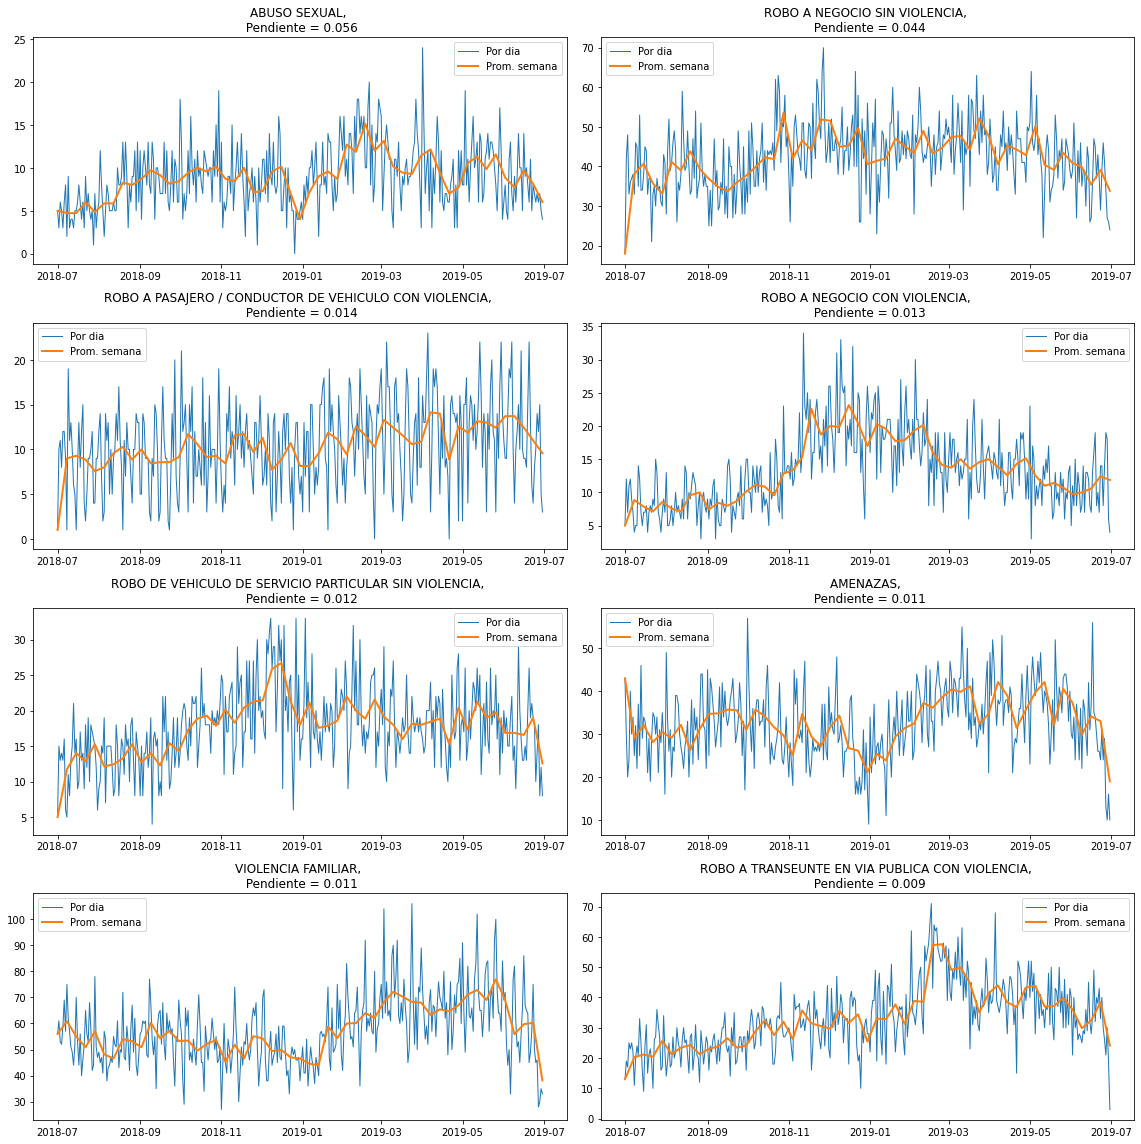

In [17]:
# Cuando indican delitos en el último año consideraremos los últimos 365 días, para construir una tabla pivote
dataset_counts = dataset[dataset.index >= '2018-07-01'][['delito']].\
pivot_table(index=['fecha_hechos_mod'],columns = ['delito'], values = ['delito'], aggfunc = len).\
fillna(0).resample('D', level=0).sum()

# A fin de evitar las pocas ocurrencias, busquemos el top 20 de delitos para graficar aquellos al alza
top_df= dataset_counts[dataset_counts.sum().nlargest(20).index]

# Ahora vamos calcular las pendientes con una regresión lineal y calcular si van a la baja o al alza
slopes = np.polyfit(x=(top_df.index - top_df.index.min()).days, y=top_df, deg=1)[0]
al_alza = top_df.iloc[:, np.argsort(slopes)[-8:]]
pendientes_a = -np.sort(-slopes)

# Ya calculados los delitos al alza, los ponemos en una gráfica
fig, axs = plt.subplots(4, 2, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    ax.plot(al_alza.iloc[:,i],linewidth=1,label='Por dia')
    ax.plot(al_alza.iloc[:,i].resample('W').mean(),linewidth=2,label='Prom. semana')
    ax.set_title(f"{al_alza.columns[i]}, \n Pendiente = {pendientes_a[i]:.3f}")
    ax.legend()

fig.tight_layout()
plt.show()

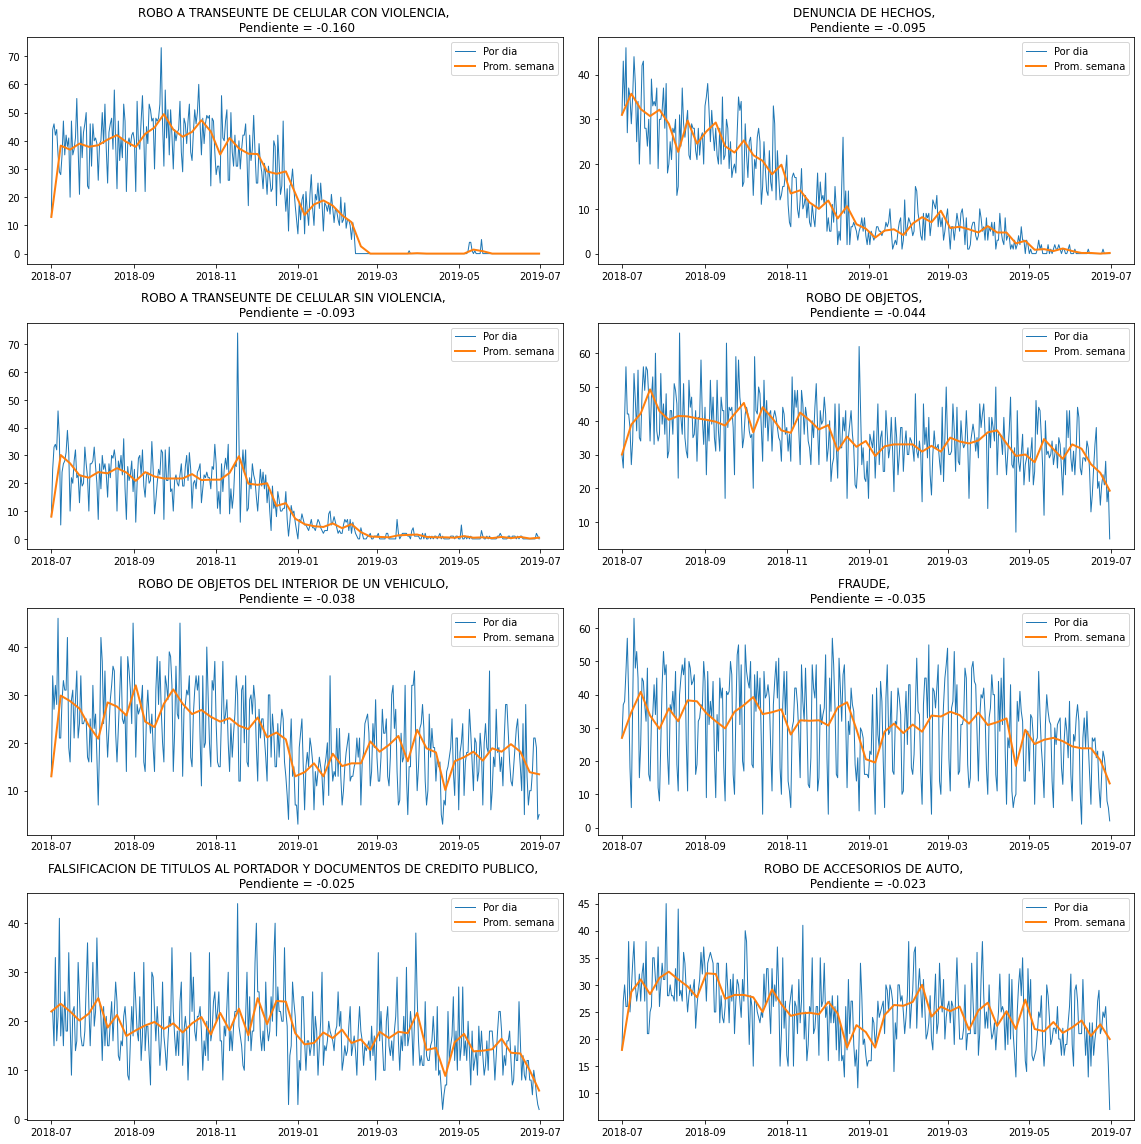

In [18]:
# Ahora calculamos los delitos a la baja
slopes = np.polyfit(x=(top_df.index - top_df.index.min()).days, y=top_df, deg=1)[0]
al_baja = top_df.iloc[:, np.argsort(slopes)[:8]]
pendientes_b = np.sort(slopes)

fig, axs = plt.subplots(4, 2, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    ax.plot(al_baja.iloc[:,i],linewidth=1,label='Por dia')
    ax.plot(al_baja.iloc[:,i].resample('W').mean(),linewidth=2,label='Prom. semana')
    ax.set_title(f"{al_baja.columns[i]}, \n Pendiente = {pendientes_b[i]:.3f}")
    ax.legend()

fig.tight_layout()
plt.show()

#### 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [19]:
# Aquí realizamos una agregación para calcular el ranking de delitos por alcaldía
dataset_counts = dataset.groupby('alcaldia_hechos').size().reset_index(name='obs').sort_values(by = 'obs', \
                                                                              ascending = False)
dataset_counts['ratio_pct'] = 100 * dataset_counts['obs']/dataset_counts['obs'].sum()
dataset_counts

,alcaldia_hechos,obs,ratio_pct
5,CUAUHTEMOC,131397,16.420376
8,IZTAPALAPA,119926,14.986872
6,GUSTAVO A MADERO,80097,10.009535
2,BENITO JUAREZ,70599,8.822592
3,COYOACAN,54235,6.777621
10,MIGUEL HIDALGO,53688,6.709264
0,ALVARO OBREGON,52568,6.569300
14,VENUSTIANO CARRANZA,46224,5.776505
13,TLALPAN,46179,5.770882
1,AZCAPOTZALCO,39435,4.928100


In [20]:
# Vamos a concatenar los datos de distritos con la mayor y menor cantidad de delitos
print(f"La alcaldia con más delitos es \
{dataset_counts['alcaldia_hechos'].head(1).to_string(index=False).title()} \
y la alcaldia con menos delitos es \
{dataset_counts['alcaldia_hechos'].tail(1).to_string(index=False).title()}.")

La alcaldia con más delitos es Cuauhtemoc y la alcaldia con menos delitos es Milpa Alta.


Respecto a la razón de la incidencia de delitos por distrito, primero observamos el número de habitantes por cada alcaldía [4], el cual nos indica que Milpa Alta es quien tiene menos habitantes. Este no es el caso del Cuauhtémoc, quien no es el distrito con más habitantes, aunque si es el centro cultural e histórico de la Ciudad de México.[5]  
El análisis exploratorio de estos datos permite establecer razones en base a los datos disponibles, sin embargo para poder explicar las razones puntuales de la cantidad de delitos en cada distrito es preferible obtener más datos.

#### 6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos?

In [21]:
# En este caso un agregado nos dará un ranking de las 3 colonias con más delitos por alcaldía.
dataset_counts = dataset[['alcaldia_hechos', 'colonia_hechos']].\
groupby(['alcaldia_hechos','colonia_hechos']).size().\
to_frame().rename(columns={0:'delitos'}).\
sort_values(by = ['alcaldia_hechos','delitos'], ascending = [True,False])

dataset_counts.groupby(level=0).head(3)

delitos
alcaldia_hechos        colonia_hechos                           
ALVARO OBREGON         JARDINES DEL PEDREGAL                2335
                       SAN ANGEL                            2019
                       ZEDEC SANTA FE                       1843
AZCAPOTZALCO           EL ROSARIO                           2820
                       INDUSTRIAL VALLEJO                   1930
                       CENTRO DE AZCAPOTZALCO               1796
BENITO JUAREZ          DEL VALLE CENTRO                    12644
                       NARVARTE                             9317
                       PORTALES SUR                         4587
COYOACAN               PEDREGAL DE SANTO DOMINGO            4434
                       AJUSCO                               2377
                       DEL CARMEN                           2348
CUAJIMALPA DE MORELOS  CUAJIMALPA                           1693
                       LOMAS DE SANTA FE                    1655
                       SAN JOSÉ DE LOS CEDROS               1008
CUAUHTEMOC             CENTRO                              28751
                       DOCTORES                            16657
                       ROMA NORTE                          10403
GUSTAVO A MADERO       LINDAVISTA                           3737
                       GUADALUPE TEPEYAC                    3208
                       SAN FELIPE DE JESÚS                  2284
IZTACALCO              AGRÍCOLA ORIENTAL                    6663
                       AGRÍCOLA PANTITLAN                   5476
                       GRANJAS MÉXICO                       3604
IZTAPALAPA             CENTRAL DE ABASTO                    5264
                       LOMAS DE SAN LORENZO                 3060
                       DESARROLLO URBANO QUETZALCOATL       2990
LA MAGDALENA CONTRERAS SAN JERÓNIMO LÍDICE                  1452
                       SAN NICOLÁS TOTOLAPAN                1008
                       SAN BERNABÉ OCOTEPEC                  672
MIGUEL HIDALGO         POLANCO                              7131
                       ANAHUAC                              3796
                       LOMAS DE CHAPULTEPEC I SECCIÓN       3196
MILPA ALTA             CRUZTITLA (SAN ANTONIO TECOMITL)      390
                       SANTA MARTHA (VILLA MILPA ALTA)       342
                       SAN MIGUEL (SAN PABLO OZTOTEPEC)      340
TLAHUAC                DEL MAR                              1121
                       MIGUEL HIDALGO                       1058
                       SAN FRANCISCO TLALTENCO               881
TLALPAN                SAN ANDRÉS TOTOLTEPEC                3000
                       TLALPAN CENTRO I                     1832
                       HÉROES DE PADIERNA                   1798
VENUSTIANO CARRANZA    JARDÍN BALBUENA                      4464
                       MOCTEZUMA 2A SECCIÓN                 3549
                       ZONA CENTRO                          3060
XOCHIMILCO             SAN GREGORIO ATLAPULCO               1607
                       SANTIAGO TEPALCATLALPAN              1301
                       SANTA CRUZ ACALPIXCA - PUEBLO        1223

#### 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

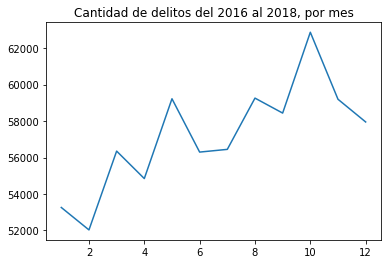

In [22]:
# Vamos a observar los delitos y su comportamiento por cada mes, en 3 años completos
data_trend = dataset[dataset.index <= '2018-12-31']
por_mes = data_trend['fecha_hechos'].groupby(data_trend['fecha_hechos'].dt.month).count()
plt.plot(por_mes)
plt.title('Cantidad de delitos del 2016 al 2018, por mes')
plt.show()

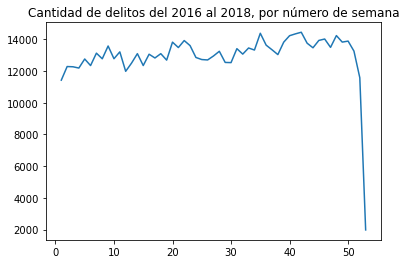

In [23]:
# Pasemos a observar los delitos por la semana
por_semana = data_trend['fecha_hechos'].groupby(data_trend['fecha_hechos'].dt.isocalendar().week).count()
plt.plot(por_semana)
plt.title('Cantidad de delitos del 2016 al 2018, por número de semana')
plt.show()

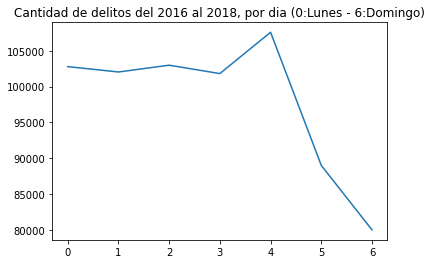

In [24]:
# Ahora por día de la semana
por_dia = data_trend['fecha_hechos'].groupby(data_trend['fecha_hechos'].dt.dayofweek).count()
plt.plot(por_dia)
plt.title('Cantidad de delitos del 2016 al 2018, por dia (0:Lunes - 6:Domingo)')
plt.show()

En las gráficas mostradas podemos apreciar que el mes con mayor número de delitos es octubre y que el día con mayor número de delitos es el día viernes.

#### 8. ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [25]:
# Primero hacemos una lista de los delitos por ranking
delitos = pd.DataFrame(dataset.groupby('delito').size()).rename(
    columns = { 0: 'no_delitos'}
).sort_values(by='no_delitos', ascending=False)

# Luego hacemos una tabla pivote que cruce alcadias con delitos, pero solo tomaremos los 20 delitos más frecuentes
delito_alcaldia = dataset[['delito', 'alcaldia_hechos']].\
pivot_table(index=['alcaldia_hechos'],columns=['delito'],values=['delito'],aggfunc=len).\
fillna(0)[delitos.index[:20]]

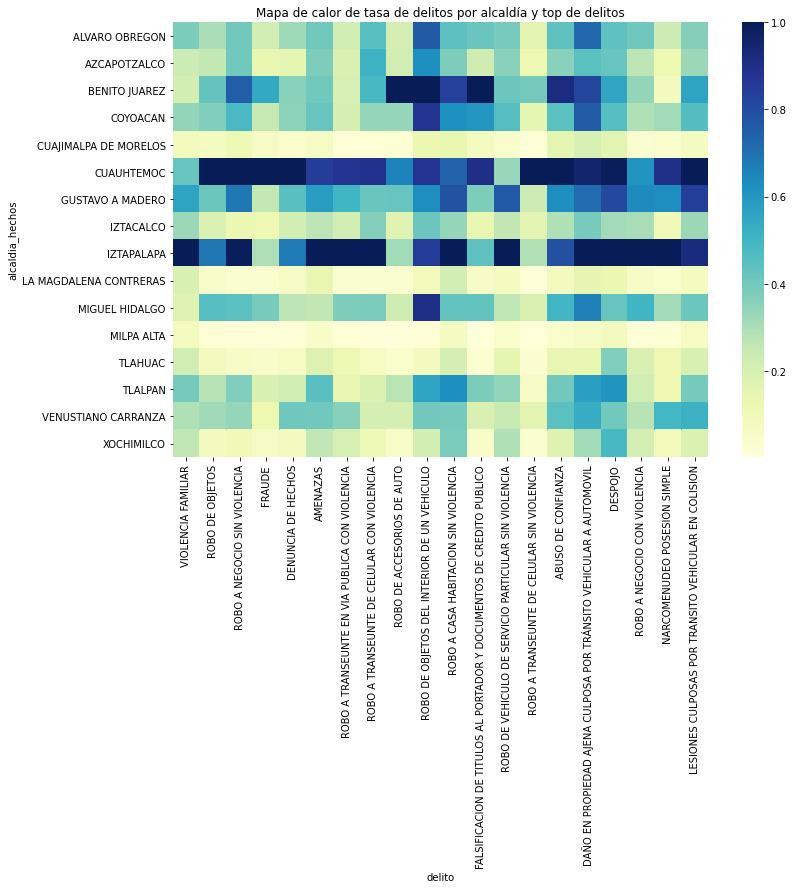

In [26]:
# Probemos primero por escalar los datos de delitos, para que no se enmascaren
delito_alcaldia_sc = delito_alcaldia.apply(lambda x: x/x.max(), axis=0)
# Creamos un mapa de calor con la tabla pivote, para ver la frecuencia por delito (en vertical)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(delito_alcaldia_sc, ax = ax, cmap = 'YlGnBu')
ax.plot()
plt.title('Mapa de calor de tasa de delitos por alcaldía y top de delitos')
plt.show()


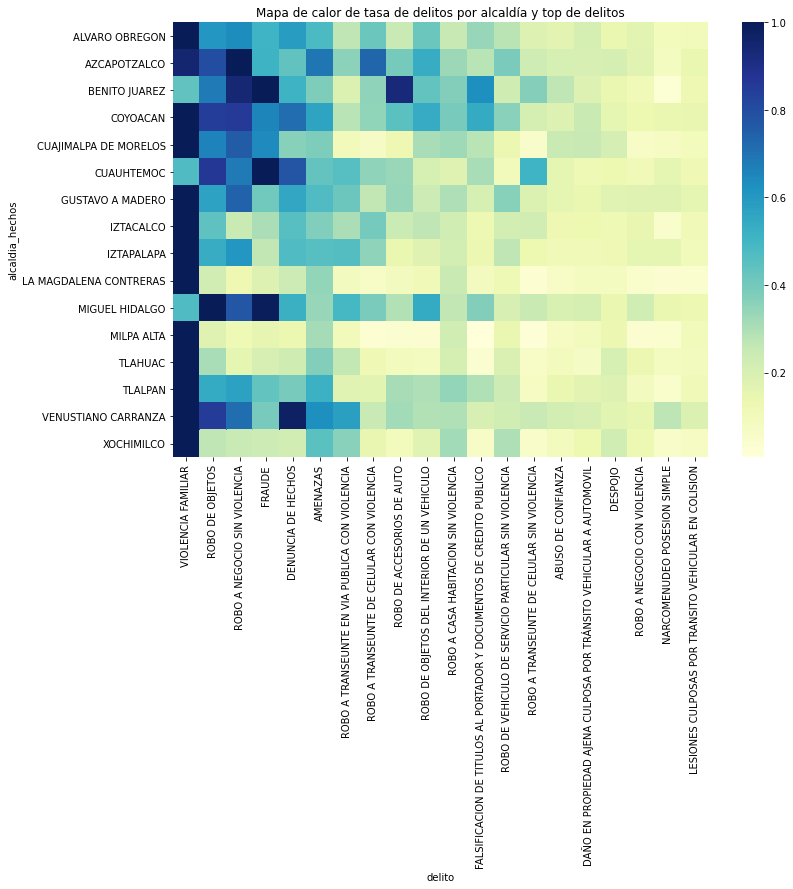

In [27]:
# Ahora escalaremos la frecuencia por alcaldía
alcaldia_delito_sc = delito_alcaldia.apply(lambda x: x/x.max(), axis=1)
# Creamos un mapa de calor con la tabla pivote, para ver la frecuencia por alcaldía (en horizontal)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(alcaldia_delito_sc, ax=ax, cmap='YlGnBu')
ax.plot()
plt.title('Mapa de calor de tasa de delitos por alcaldía y top de delitos')
plt.show()

Con la primera gráfica creada, podemos responder que delitos ocurren con más frecuencia en una alcaldía. Por ejemplo, en Cuauhtémoc es más frecuente el robo de celular sin violencia, lo cual ocurre con menos frecuencia en otros distritos. Otro ejemplo es que en Benito Juárez ocurren más robos de accesorios de autos, en contraste con el resto de distritos.

#### 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado). Pinta un mapa con este indicador. Describe los resultados.

Este mapa se descargará a la carpeta raiz de este proyecto, asimismo se ha buscado un mapa con los polígonos de los distritos de la Ciudad de México, para poder graficarlos sobre un mapa.

#### 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

#### 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

#### 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

In [28]:
# De los datos de delitos filtramos ambas tipificaciones de delitos
robo_pasajero = dataset[dataset['delito'].isin(['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',\
                                                'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA'])]\
[['calle_hechos', 'delito']]

# Ahora creamos una tabla pivote
robo_pasajero_pv = robo_pasajero.pivot_table(index=['calle_hechos'],columns=['delito'],\
                                             values=['delito'],aggfunc=len).fillna(0).reset_index()
# Y totalizamos los robos en una columna
robo_pasajero_pv['Total'] = robo_pasajero_pv['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA'] +\
robo_pasajero_pv['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA']

# Para rankearlos y mostrar el top 10 de lugares
robo_pasajero_pv.sort_values(by='Total', ascending=False).head(10)

delito,calle_hechos,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA,Total
1055,CALZADA IGNACIO ZARAGOZA,137.0,15.0,152.0
1999,PERIFERICO,43.0,10.0,53.0
83,ANILLO PERIFERICO,35.0,14.0,49.0
997,CALZ. IGNACIO ZARAGOZA,35.0,4.0,39.0
2020,PERIFERICO SUR,17.0,13.0,30.0
779,AVENIDA TLAHUAC,27.0,2.0,29.0
798,AVENIDA UNIVERSIDAD,26.0,2.0,28.0
1502,ERMITA IZTAPALAPA,24.0,3.0,27.0
541,AVENIDA CENTENARIO,23.0,4.0,27.0
1044,CALZADA ERMITA IZTAPALAPA,23.0,3.0,26.0


En este caso podemos observar que la Calzada Ignacio Zaragoza es el lugar donde más robos a pasajeros tiene, siendo incluso el más alto en lo que refiere a violencia, muy por encima de Periferico y Anillo Periferico.

### Referencias

[1] Gobierno de la Ciudad de México. (7 de mayo del 2021). *Carpetas de investigación PGJ de la Ciudad de México (archivo)*, descargado de https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-pgj-cdmx  
[2] Wikipedia. (8 de mayo del 2021). *Ciudad de México*, descargado de https://es.wikipedia.org/wiki/Ciudad_de_México  
[3] El caso del Espectómetro de mapeo de ozono total (TOMS) ilustra el cuidado que se debe tomar con los outliers: Earth Observatory - Nasa. (7 de mayo del 2021). *Serendipity and Stratospheric Ozone*, descargado de https://earthobservatory.nasa.gov/features/RemoteSensingAtmosphere/remote_sensing5.php  
[4] Wikipedia. (8 de mayo del 2021). *Milpa Alta*, descargado de https://en.wikipedia.org/wiki/Milpa_Alta  
[5] Wikipedia. (8 de mayo del 2021). *Cuahutémoc*, descargado de https://en.wikipedia.org/wiki/Cuauhtémoc,_Mexico_City  